In [424]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)
%matplotlib inline

In [425]:
cwd = os.getcwd()
df = pd.read_csv(cwd + '\\climate_change_indicators.csv')

In [426]:
df.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,F1970,F1971,F1972,F1973,F1974,F1975,F1976,F1977,F1978,F1979,F1980,F1981,F1982,F1983,F1984,F1985,F1986,F1987,F1988,F1989,F1990,F1991,F1992,F1993,F1994,F1995,F1996,F1997,F1998,F1999,F2000,F2001,F2002,F2003,F2004,F2005,F2006,F2007,F2008,F2009,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,-0.539,0.813,0.619,-1.124,0.232,-0.489,-0.445,-0.286,0.513,0.129,0.361,0.600,0.483,-0.346,0.164,0.145,0.283,-0.141,0.391,0.919,-0.205,0.730,-0.168,-0.294,0.220,0.430,0.359,-0.116,0.471,0.675,1.198,0.993,1.311,1.365,0.587,1.373,0.401,1.720,0.675,0.704,0.895,1.613,1.397,0.223,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,-0.013,-0.106,-0.195,-0.069,-0.288,-0.139,-0.211,-0.683,0.545,-0.814,0.203,-0.414,-0.351,0.173,-0.128,-0.270,-0.103,0.569,-0.106,0.370,-0.066,0.795,-0.269,0.106,0.076,1.330,-0.172,-0.038,0.075,0.795,0.670,1.065,1.532,0.492,0.970,0.444,0.189,0.345,1.316,0.978,0.910,1.191,1.055,1.487,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,0.291,0.116,-0.385,-0.348,-0.015,-0.503,-0.539,-0.782,0.504,0.012,0.654,0.232,0.215,0.399,0.560,-0.004,0.508,0.296,0.975,1.304,0.386,1.266,0.031,-0.312,0.552,0.732,0.595,0.846,1.059,1.109,1.476,0.820,1.856,1.258,1.585,0.988,1.264,1.395,1.220,1.185,0.945,2.265,1.398,1.147,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,0.132,-0.047,-0.477,-0.067,0.330,-0.308,-0.118,-0.177,0.156,0.092,0.341,0.350,0.179,0.280,0.313,0.277,0.256,0.394,0.354,0.509,0.143,0.497,0.641,0.344,-0.069,0.189,0.755,0.784,NaN,NaN,0.242,0.626,0.904,1.152,0.716,0.191,0.801,0.403,1.032,0.670,NaN,1.311,0.854,0.924,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,-0.137,0.121,-0.326,-0.499,0.025,-0.371,0.246,-0.045,-0.093,-0.163,0.058,-0.188,0.178,1.044,0.859,-0.157,0.059,0.387,0.397,0.883,1.162,1.736,0.231,0.386,0.174,1.508,1.279,0.570,1.788,1.018,1.055,1.050,1.480,0.835,1.949,0.936,0.851,1.485,1.024,0.946,1.413,0.471,1.677,1.265,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


In [427]:
years = {x: x[1:] for x in df.columns[10:]}
df.rename(columns=years, inplace=True)

In [428]:
dfClean = df.drop(columns='ObjectId')
dfClean.drop(columns=dfClean.columns[1:9], inplace=True)
dfClean = dfClean.fillna(0)
dfClean

,Country,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"Afghanistan, Islamic Rep. of",-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,-0.539,0.813,0.619,-1.124,0.232,-0.489,-0.445,-0.286,0.513,0.129,0.361,0.600,0.483,-0.346,0.164,0.145,0.283,-0.141,0.391,0.919,-0.205,0.730,-0.168,-0.294,0.220,0.430,0.359,-0.116,0.471,0.675,1.198,0.993,1.311,1.365,0.587,1.373,0.401,1.720,0.675,0.704,0.895,1.613,1.397,0.223,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,Albania,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,-0.013,-0.106,-0.195,-0.069,-0.288,-0.139,-0.211,-0.683,0.545,-0.814,0.203,-0.414,-0.351,0.173,-0.128,-0.270,-0.103,0.569,-0.106,0.370,-0.066,0.795,-0.269,0.106,0.076,1.330,-0.172,-0.038,0.075,0.795,0.670,1.065,1.532,0.492,0.970,0.444,0.189,0.345,1.316,0.978,0.910,1.191,1.055,1.487,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,Algeria,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,0.291,0.116,-0.385,-0.348,-0.015,-0.503,-0.539,-0.782,0.504,0.012,0.654,0.232,0.215,0.399,0.560,-0.004,0.508,0.296,0.975,1.304,0.386,1.266,0.031,-0.312,0.552,0.732,0.595,0.846,1.059,1.109,1.476,0.820,1.856,1.258,1.585,0.988,1.264,1.395,1.220,1.185,0.945,2.265,1.398,1.147,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,American Samoa,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,0.132,-0.047,-0.477,-0.067,0.330,-0.308,-0.118,-0.177,0.156,0.092,0.341,0.350,0.179,0.280,0.313,0.277,0.256,0.394,0.354,0.509,0.143,0.497,0.641,0.344,-0.069,0.189,0.755,0.784,0.000,0.000,0.242,0.626,0.904,1.152,0.716,0.191,0.801,0.403,1.032,0.670,0.000,1.311,0.854,0.924,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,"Andorra, Principality of",0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,-0.137,0.121,-0.326,-0.499,0.025,-0.371,0.246,-0.045,-0.093,-0.163,0.058,-0.188,0.178,1.044,0.859,-0.157,0.059,0.387,0.397,0.883,1.162,1.736,0.231,0.386,0.174,1.508,1.279,0.570,1.788,1.018,1.055,1.050,1.480,0.835,1.949,0.936,0.851,1.485,1.024,0.946,1.413,0.471,1.677,1.265,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,Western Sahara,0.632,0.576,0.333,0.819,-0.337,0.284,-0.026,-0.368,0.383,0.543,-0.637,-1.096,-0.014,-0.589,-0.266,-0.959,0.119,0.403,0.537,0.497,0.621,0.418,0.837,0.432,0.759,0.294,1.109,0.384,0.691,1.367,0.550,0.529,0.315,0.903,1.356,1.353,1.536,1.415,0.935,0.874,1.296,1.249,1.387,1.550,1.210,1.406,0.903,1.351,0.938,1.898,1.579,1.344,1.423,1.401,1.510,1.732,2.204,0.942,1.477,2.069,1.593,1.970
221,World,0.211,0.038,0.168,-0.246,-0.223,0.201,-0.117,-0.126,-0.092,0.150,-0.093,-0.199,0.269,-0.181,0.088,-0.314,0.269,0.001,0.226,0.332,0.443,0.086,0.460,0.127,-0.031,0.242,0.403,0.558,0.331,0.639,0.468,0.184,0.348,0.507,0.835,0.355,0.656,0.993,0.783,0.728,0.834,1.021,0.893,0.913,1.095,0.998,1.195,0.935,0.957,1.219,0.921,1.074,1.016,1.053,1.412,1.660,1.429,1.290,1.444,1.711,1.447,1.394
222,"Yemen, Rep. of",0.029,-0.009,0.169,-0.251,-0.623,0.089,-0.257,-0.252,0.262,0.387,-0.205,0.041,0.328,-0.114,0.026,-0.081,0.394,0.410,0.547,0.830,0.040,-0.044,0.086,0.273,0.527,-0.120,0.012,0.971,0.361,0.457,0.000,0.000,0.000,0.000,0.000,0.000,0.107,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
223,Zambia,0.228,-0.168,-0.390,-0.279,-0.418,0.300,-0.014,-0.130,0.243,0.351,-0.249,-0.139,0.383,-0.405,-0.127,-0.314,0.510,0.087,0.249,0.138,-0.158,0.340,1.064,0.575,0.206,0.061,0.958,0.627,0.139,0

In [429]:
dfBrazil = dfClean[df['Country']=='Brazil']

In [430]:
dfBrazil = pd.melt(dfBrazil, id_vars='Country',var_name='Year',value_name='Degree Change')
dfBrazil['Year'] =dfBrazil['Year'].astype(np.int16) 
dfBrazil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        62 non-null     object 
 1   Year           62 non-null     int16  
 2   Degree Change  62 non-null     float64
dtypes: float64(1), int16(1), object(1)
memory usage: 1.2+ KB


In [431]:
dfBrazil

,Country,Year,Degree Change
0,Brazil,1961,0.167
1,Brazil,1962,-0.184
2,Brazil,1963,0.158
3,Brazil,1964,-0.213
4,Brazil,1965,-0.075
...,...,...,...
57,Brazil,2018,1.148
58,Brazil,2019,1.517
59,Brazil,2020,1.477
60,Brazil,2021,1.154


C:\Users\guuii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\guuii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'Climate Change in Brazil')

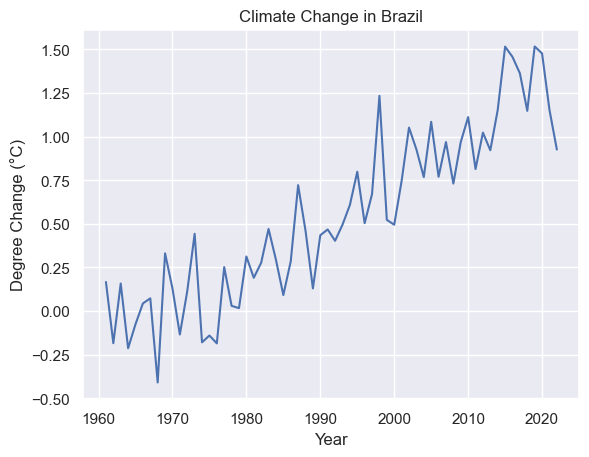

In [432]:
sns.lineplot(data=dfBrazil, x='Year', y='Degree Change')
plt.ylabel('Degree Change (°C)')
plt.title('Climate Change in Brazil')

In [433]:
dfMelt = pd.melt(dfClean, id_vars='Country',var_name='Year',value_name='Degree Change' )
dfMelt

,Country,Year,Degree Change
0,"Afghanistan, Islamic Rep. of",1961,-0.113
1,Albania,1961,0.627
2,Algeria,1961,0.164
3,American Samoa,1961,0.079
4,"Andorra, Principality of",1961,0.736
...,...,...,...
13945,Western Sahara,2022,1.970
13946,World,2022,1.394
13947,"Yemen, Rep. of",2022,0.000
13948,Zambia,2022,0.686


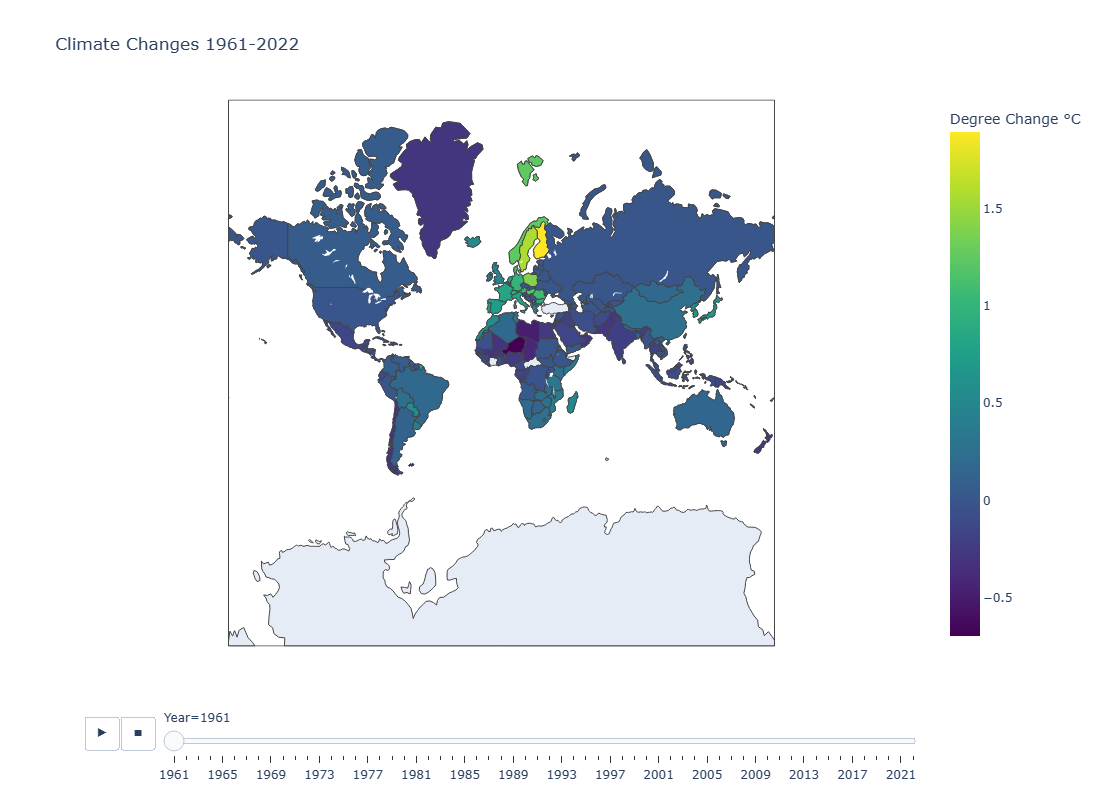

In [434]:
fig = px.choropleth(
    dfMelt,
    locations='Country',
    locationmode="country names",
    color='Degree Change',
    color_continuous_scale='Viridis',
    animation_frame='Year', 
    title='Climate Changes 1961-2022',
    labels={'Degree Change': 'Degree Change °C'},
    width=1000,
    height=800
)

fig.update_geos(projection_type='mercator', showcoastlines=False, showland=True, showcountries=True)

In [435]:
fig.write_html("climate_changes_map.html")